#### 01.03.25, &copy; Dmytro Sokhin KI-21-1, 2025

# Лабораторна робота #1. Побудова простого лінійного бінарного класифікатора.

**Мета**: реалізузвати найпростійший бінарний класифікатор засобами мови Python

## Що ви будете вміти?
* Познайомитеся з деякими можлвостями бібліотеки `NumPy`
* Реалізувати простий лінійний класифікатор Розенблата на мові Python

## Завдання для самостійної роботи 

1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).

In [2]:
import json

# Створення файлу з даними (якщо файл ще не існує)
data = {
    "x_train_10": [
        [43, 16],
        [24, 35],
        [33, 11],
        [42, 46],
        [30, 39],
        [20, 48],
        [25, 37],
        [27, 12],
        [5, 33]
    ],
    "y_train_10": [-1, 1, -1, -1, -1, -1, -1, 1, 1]
}

# Запис даних у файл data_variant10.json
with open("data_variant10.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

# Імпорт даних з файлу
with open("data_variant10.json", "r", encoding="utf-8") as f:
    imported_data = json.load(f)

x_train_10 = imported_data["x_train_10"]
y_train_10 = imported_data["y_train_10"]

print("x_train_10:", x_train_10)
print("y_train_10:", y_train_10)


x_train_10: [[43, 16], [24, 35], [33, 11], [42, 46], [30, 39], [20, 48], [25, 37], [27, 12], [5, 33]]
y_train_10: [-1, 1, -1, -1, -1, -1, -1, 1, 1]


2. Побудувати бінарний класифікатор і вивести результати бінарної класифікації на графіку.

Matplotlib is building the font cache; this may take a moment.


Коефіцієнти моделі: [[-22.  10.]]
Вільний член: [3.]


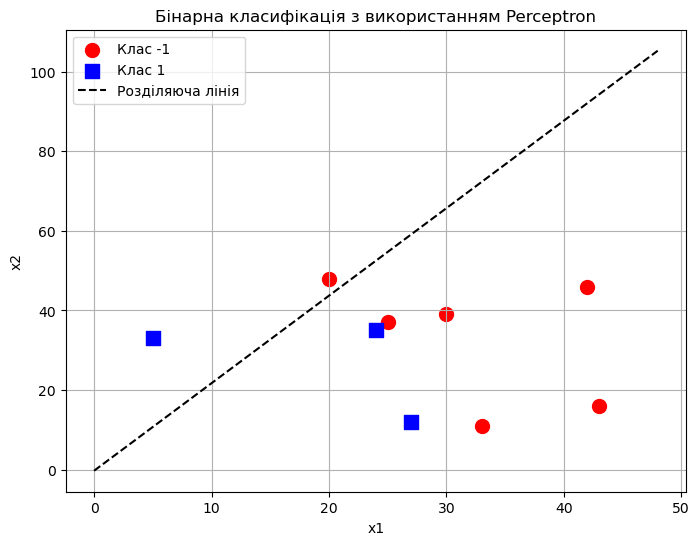

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Вхідні дані для варіанту 10
x_train_10 = np.array([
    [43, 16],
    [24, 35],
    [33, 11],
    [42, 46],
    [30, 39],
    [20, 48],
    [25, 37],
    [27, 12],
    [5, 33]
])
y_train_10 = np.array([-1, 1, -1, -1, -1, -1, -1, 1, 1])

# Створення та навчання моделі
model = Perceptron()
model.fit(x_train_10, y_train_10)

# Виведення параметрів моделі
print("Коефіцієнти моделі:", model.coef_)
print("Вільний член:", model.intercept_)

# Побудова графіку
plt.figure(figsize=(8, 6))

# Відображення точок для кожного класу
for label, marker, color in zip([-1, 1], ['o', 's'], ['red', 'blue']):
    plt.scatter(x_train_10[y_train_10 == label][:, 0],
                x_train_10[y_train_10 == label][:, 1],
                marker=marker, color=color, label=f'Клас {label}', s=100)

# Побудова розділяючої лінії
# Рівняння лінії: coef[0]*x + coef[1]*y + intercept = 0  =>  y = (-coef[0]*x - intercept) / coef[1]
x_vals = np.linspace(x_train_10[:, 0].min() - 5, x_train_10[:, 0].max() + 5, 100)
y_vals = (-model.coef_[0][0] * x_vals - model.intercept_[0]) / model.coef_[0][1]
plt.plot(x_vals, y_vals, 'k--', label='Розділяюча лінія')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Бінарна класифікація з використанням Perceptron")
plt.grid(True)
plt.show()


3. Дати відповіді на контрольні запитання.

4. Відправити результати роботи у файлі lab_1_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання?

Розпізнавання образів у машинному навчанні ґрунтується на кількох ключових принципах:

1. Представлення даних:
Об'єкти (образи) кодуються у вигляді числових векторів або інших форматів даних, що відображають їх властивості (наприклад, піксельні значення зображень). Для покращення якості аналізу даних застосовують нормалізацію, масштабування та зменшення розмірності.

2. Екстракція ознак:
Вибір або автоматичне виведення релевантних характеристик, які дозволяють розрізняти різні класи образів. Методи можуть бути як ручними (наприклад, HOG, SIFT), так і автоматичними (наприклад, використання глибоких нейронних мереж).

3. Побудова моделі:
Використання алгоритмів класифікації (персептрон, SVM, дерева рішень, нейронні мережі тощо) для навчання системи розпізнавання образів. Вибір алгоритму залежить від природи даних та поставлених завдань.

4. Навчання та оптимізація:
Налаштування параметрів моделі за допомогою навчальної вибірки з метою мінімізації помилок класифікації. Тут застосовують методи оптимізації (градієнтний спуск, регуляризацію) для запобігання перенавчанню.

2. Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?

Навчальна вибірка – це набір даних, на якому "навчається" модель машинного навчання. Вона містить як вхідні дані (наприклад, зображення чи інші ознаки), так і відповідні мітки (класи, до яких ці дані належать). Ось чому вона є критично важливою для процесу розпізнавання образів:

1. Навчання моделі:
Модель аналізує навчальну вибірку, щоб визначити закономірності та встановити залежності між ознаками зображень та їхніми мітками. Саме на цьому етапі формується здатність моделі правильно класифікувати об'єкти.

2. Налаштування параметрів:
Під час навчання модель оптимізує свої параметри, мінімізуючи помилки класифікації. Якість навчальної вибірки безпосередньо впливає на точність цього процесу.

3. Узагальнення:
Якщо вибірка є репрезентативною та містить достатньо різноманітних прикладів, модель зможе краще узагальнювати інформацію. Це дозволяє їй правильно класифікувати нові, раніше невідомі дані, що є важливим для реальних застосувань.

4. Запобігання перенавчанню:
Правильно підібрана навчальна вибірка допомагає уникнути ситуації, коли модель надто точно підлаштовується під конкретні дані (перенавчання), а її здатність працювати з новими даними знижується.

3. Сформулювати постановку  задачі бінарної класифікації.

Маємо набір вхідних векторів, кожен з яких буде має два вхідних значення, а вихідна (цільова) змінна приймати два дискретних значення:

$$
x_i=[x_{i1}, x_{i2}]^T, i=1, 2, ...
$$
$$
\begin{cases}
+1, & \text{якщо $x \in С_1$,} \\
-1, & \text{якщо $x \in С_2$.}
\end{cases}
$$

Уточнемо: якщо ми попадаємо у клас $C_1$, то мітка буде $+1$, інакше -- $C_2$. Задача полягає в знаходженні рівняння прямої лінії $a(x)=kx+b$, яка розділяє два класи.

Так виглядає постановка задачі бінарної класифікації.

4. Що таке рівняння гіперплощини, і як воно використовується для розв'язання задачі бінарної класифікації?

## Рівняння гіперплощини

Рівняння гіперплощини – це математичний вираз, який описує розділяючу лінію в просторі ознак. Для n-вимірного простору воно записується як

$$
w^T x + b = 0,
$$

де:
- **\( w \)** – вектор ваг (коефіцієнтів),
- **\( x \)** – вектор ознак,
- **\( b \)** – зсув (bias).

## Використання в бінарній класифікації

При побудові бінарного класифікатора гіперплощина слугує розділяючою межею між двома класами. Рішення про приналежність об'єкта до певного класу приймається за знаком значення

$$
w^T x + b:
$$

- Якщо **\( w^T x + b \ge 0 \)**, об'єкт відноситься до одного класу.
- Якщо **\( w^T x + b < 0 \)**, об'єкт відноситься до іншого класу.

Таким чином, знаходження оптимальної гіперплощини (наприклад, з максимальним відступом, як у методі опорних векторів) дозволяє забезпечити ефективне розділення даних на класи, що є основою для розв'язання задачі бінарної класифікації.


5. Наведіть кроки для розв'язання простої задачі бінарної класифікації за допомогою машинного навчання.

Нижче наведено основні кроки для розв'язання простої задачі бінарної класифікації за допомогою машинного навчання:

1. Збір даних:
Зберіть навчальну вибірку, що містить вхідні дані (ознаки) та відповідні мітки (класи, наприклад, -1/1 або 0/1).

2. Попередня обробка даних:

- Очистіть дані від шуму та пропусків.
- Нормалізуйте чи стандартизуйте ознаки для покращення роботи алгоритму.
- За необхідності виконайте зменшення розмірності або виділення ознак.

3. Розділення даних:
Розділіть дані на навчальну, валідаційну та тестову вибірки, щоб мати можливість оцінити якість моделі на нових даних.

4. Вибір моделі:
Оберіть відповідний алгоритм класифікації (наприклад, логістична регресія, персептрон, SVM або інші) залежно від характеру задачі та даних.

5. Навчання моделі:
Використовуйте навчальну вибірку для підбору параметрів моделі (наприклад, ваг та зсуву у випадку лінійного класифікатора).